In [1]:
import pandas as pd
import numpy as np

In [2]:
diaries = pd.read_csv("Y:\CIS-PD Study\MJFF Curation\DiaryACC\diaries_official.csv")
form238 = pd.read_hdf("Y:\CIS-PD MUSC\decoded_forms\\form238.h5")
user_id_pairings = pd.read_csv("Y:\CIS-PD MUSC\decoded_forms\\videoID.csv")
diaries['timestamp'] = pd.to_datetime(diaries['timestamp'])
diaries.style

In [3]:
# get the 6 digit user_id from the corresponding 4 digit user_id
def user_id_4_to_6(user_id_4):
    for index, row in user_id_pairings.iterrows():
        if (int(row['SubjectCode'])==int(user_id_4) and not np.isnan(row['Subj ID Athena'])):
            return int(row['Subj ID Athena'] )
    return None

In [4]:
# find corresponding diary entries

In [5]:
columns = ['user_id', 'visit date', 'MDS score', 'ON_OFF mean', 'ON_OFF std',
          'RATE_DYSKINESIA mean', 'RATE_DYSKINESIA std', 'TREMOR mean', 'TREMOR std',
          'ACTIVITY_INTENSITY mean', 'ACTIVITY_INTENSITY std', 'gait_detection mean',
          'gait_detection std', 'activity mean', 'activity std']
data = []
for index, row in form238.iterrows():
    new_row = []
    new_row.append(user_id_4_to_6(row['SubjectCode']))
    new_row.append(row['FormDate'])
    next_question = 33
    sum = 0
    while (next_question <= 65):
        next_q = "Q" + next_question.__str__()
        if (not np.isnan(row[next_q])):
            sum += int(row[next_q])
        next_question += 1
    new_row.append(sum)
    start = diaries['timestamp'] >= (row['FormDate'] - pd.Timedelta('72:00:00')) 
    end = diaries['timestamp'] <= (row['FormDate'] + pd.Timedelta('24:00:00'))
    corresponding_diaries = diaries[start & end]
    new_row.append(corresponding_diaries['ON_OFF'].mean())
    new_row.append(corresponding_diaries['ON_OFF'].std())
    new_row.append(corresponding_diaries['RATE_DYSKINESIA'].mean())
    new_row.append(corresponding_diaries['RATE_DYSKINESIA'].std())
    new_row.append(corresponding_diaries['TREMOR'].mean())
    new_row.append(corresponding_diaries['TREMOR'].std())
    new_row.append(corresponding_diaries['ACTIVITY_INTENSITY'].mean())
    new_row.append(corresponding_diaries['ACTIVITY_INTENSITY'].std())
    new_row.append(corresponding_diaries['gait_detection'].mean())
    new_row.append(corresponding_diaries['gait_detection'].std())
    new_row.append(corresponding_diaries['activity_mean'].mean())
    new_row.append(corresponding_diaries['activity_mean'].std())
    
    data.append(new_row)
    curated_data = pd.DataFrame(data = data, columns = columns)
    #curated_data.to_csv("Y:\CIS-PD Study\MJFF Curation\DiaryACC\MDS_diary_paired_data.csv")

In [6]:
correlations = curated_data.corr(method = 'pearson')
correlations.style

In [7]:
subjects = curated_data['user_id'].unique()
columns = ['user_id', 'corr. ON_OFF', 'corr. RATE_DYSKINESIA', 'corr. TREMOR', 'corr. ACTIVITY_INTENSITY', 'corr. gait_detection', 'corr activity']
overall = []
MDS_correlations = []
overall.append("overall")
overall.append(correlations.loc['MDS score', 'ON_OFF mean'])
overall.append(correlations.loc['MDS score', 'RATE_DYSKINESIA mean'])
overall.append(correlations.loc['MDS score', 'TREMOR mean'])
overall.append(correlations.loc['MDS score', 'ACTIVITY_INTENSITY mean'])
overall.append(correlations.loc['MDS score', 'gait_detection mean'])
overall.append(correlations.loc['MDS score', 'activity mean'])
MDS_correlations.append(overall)

for subj in subjects:
    new_row = []
    new_row.append(subj)
    correlations = curated_data[curated_data['user_id'] == subj]
    correlations = correlations.corr(method = 'pearson')
    new_row.append(correlations['MDS score']['ON_OFF mean'])
    new_row.append(correlations['MDS score']['RATE_DYSKINESIA mean'])
    new_row.append(correlations['MDS score']['TREMOR mean'])
    new_row.append(correlations['MDS score']['ACTIVITY_INTENSITY mean'])
    new_row.append(correlations['MDS score']['gait_detection mean'])
    new_row.append(correlations['MDS score']['activity mean'])
    MDS_correlations.append(new_row)
mds_corr = pd.DataFrame(data = MDS_correlations, columns = columns)
mds_corr.to_csv("Y:\CIS-PD Study\MJFF Curation\DiaryACC\MDS_correlations 2.csv")
mds_corr.style

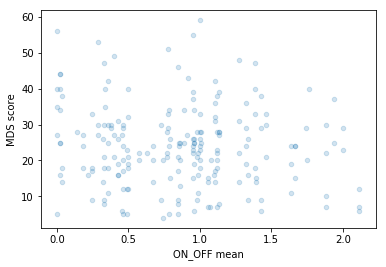

In [8]:
curated_data.plot(x = 'ON_OFF mean', y = 'MDS score', kind = 'scatter', alpha = 0.2)

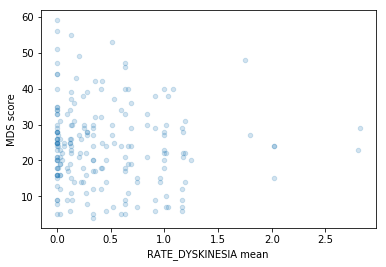

In [9]:
curated_data.plot(x = 'RATE_DYSKINESIA mean', y = 'MDS score', kind = 'scatter', alpha = 0.2)

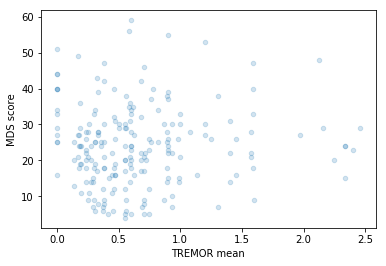

In [10]:
curated_data.plot(x = 'TREMOR mean', y = 'MDS score', kind = 'scatter', alpha = 0.2)

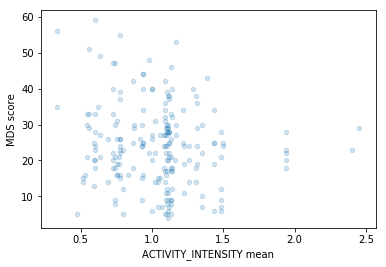

In [11]:
curated_data.plot(x = 'ACTIVITY_INTENSITY mean', y = 'MDS score', kind = 'scatter', alpha = 0.2)

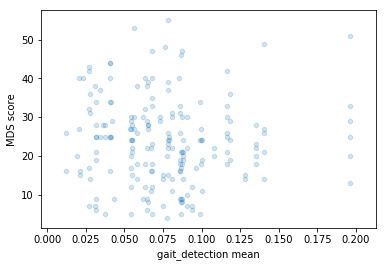

In [12]:
curated_data.plot(x = 'gait_detection mean', y = 'MDS score', kind = 'scatter', alpha = 0.2)

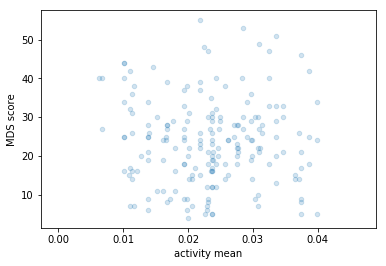

In [13]:
curated_data.plot(x = 'activity mean', y = 'MDS score', kind = 'scatter', alpha = 0.2)

In [14]:
# Repeat with tremor specific MDS score only
columns = ['user_id', 'visit date', 'MDS score', 'ON_OFF mean', 'ON_OFF std',
          'RATE_DYSKINESIA mean', 'RATE_DYSKINESIA std', 'TREMOR mean', 'TREMOR std',
          'ACTIVITY_INTENSITY mean', 'ACTIVITY_INTENSITY std', 'gait_detection mean',
          'gait_detection std', 'activity mean', 'activity std']
data = []
for index, row in form238.iterrows():
    new_row = []
    new_row.append(user_id_4_to_6(row['SubjectCode']))
    new_row.append(row['FormDate'])
    next_question = 56
    sum = 0
    while (next_question <= 65):
        next_q = "Q" + next_question.__str__()
        if (not np.isnan(row[next_q])):
            sum += int(row[next_q])
        next_question += 1
    new_row.append(sum)
    start = diaries['timestamp'] >= (row['FormDate'] - pd.Timedelta('72:00:00')) 
    end = diaries['timestamp'] <= (row['FormDate'] + pd.Timedelta('24:00:00'))
    corresponding_diaries = diaries[start & end]
    new_row.append(corresponding_diaries['ON_OFF'].mean())
    new_row.append(corresponding_diaries['ON_OFF'].std())
    new_row.append(corresponding_diaries['RATE_DYSKINESIA'].mean())
    new_row.append(corresponding_diaries['RATE_DYSKINESIA'].std())
    new_row.append(corresponding_diaries['TREMOR'].mean())
    new_row.append(corresponding_diaries['TREMOR'].std())
    new_row.append(corresponding_diaries['ACTIVITY_INTENSITY'].mean())
    new_row.append(corresponding_diaries['ACTIVITY_INTENSITY'].std())
    new_row.append(corresponding_diaries['gait_detection'].mean())
    new_row.append(corresponding_diaries['gait_detection'].std())
    new_row.append(corresponding_diaries['activity_mean'].mean())
    new_row.append(corresponding_diaries['activity_mean'].std())
    
    data.append(new_row)
    curated_data = pd.DataFrame(data = data, columns = columns)
curated_data.style

In [15]:
correlations = curated_data.corr(method = 'pearson')
correlations.style